In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost as xgb
import datetime as dt

In [31]:
df = pd.read_csv("marketing_campaign.csv")
df.sample(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
776   1072.0         NaN         PhD         Single  40760.0      0.0   
16       NaN      1980.0  Graduation        Married  41850.0      1.0   
690   7230.0         NaN         PhD       Divorced      NaN      0.0   
1081   247.0      1971.0  Graduation        Married  36715.0      1.0   
510   9925.0      1981.0         NaN       Together  39665.0      1.0   
1424     NaN      1959.0  Graduation            NaN      NaN      0.0   
912   9760.0      1963.0         PhD          Widow  52278.0      0.0   
797    796.0      1965.0    2n Cycle       Divorced  60161.0      0.0   
1279     NaN      1975.0  Graduation            NaN  46149.0      0.0   
2026  4198.0      1965.0  Graduation            NaN  29672.0      1.0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntGoldProds  \
776        1.0  30-08-2013     64.0      70.0        0.0           NaN   
16         1.0  24-12-2012      NaN       NaN        5.0           4.0   
690        1.0   4/10/2012     98.0     459.0        0.0           4.0   
1081       0.0  17-11-2012     16.0     172.0       10.0          16.0   
510        0.0  25-05-2013     97.0     127.0        1.0          31.0   
1424       0.0  28-12-2012     77.0       6.0        1.0          19.0   
912        1.0  25-01-2013     24.0     953.0        0.0         174.0   
797        1.0  23-10-2012     17.0     584.0       44.0         177.0   
1279       1.0  29-11-2013     36.0     254.0        6.0           NaN   
2026       1.0   12/3/2013      6.0       9.0        NaN           8.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
776                 2.0              2.0                  1.0   
16                  3.0              NaN                  0.0   
690                 6.0              4.0                  5.0   
1081                6.0              7.0                  2.0   
510                 3.0              4.0                  2.0   
1424                1.0              1.0                  1.0   
912                 6.0             10.0                  5.0   
797                 3.0             11.0                  4.0   
1279                5.0              5.0                  1.0   
2026                1.0              NaN                  0.0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
776                 3.0                6.0           0.0           NaN   
16                  NaN                NaN           0.0           0.0   
690                 7.0                6.0           0.0           NaN   
1081                4.0                NaN           0.0           0.0   
510                 NaN                NaN           0.0           0.0   
1424                2.0                8.0           NaN           0.0   
912                10.0                NaN           0.0           0.0   
797                 8.0                NaN           0.0           0.0   
1279                7.0                5.0           0.0           0.0   
2026                3.0                6.0           NaN           0.0   

      Response  
776        0.0  
16         0.0  
690        1.0  
1081       1.0  
510        0.0  
1424       0.0  
912        1.0  
797        0.0  
1279       NaN  
2026       0.0

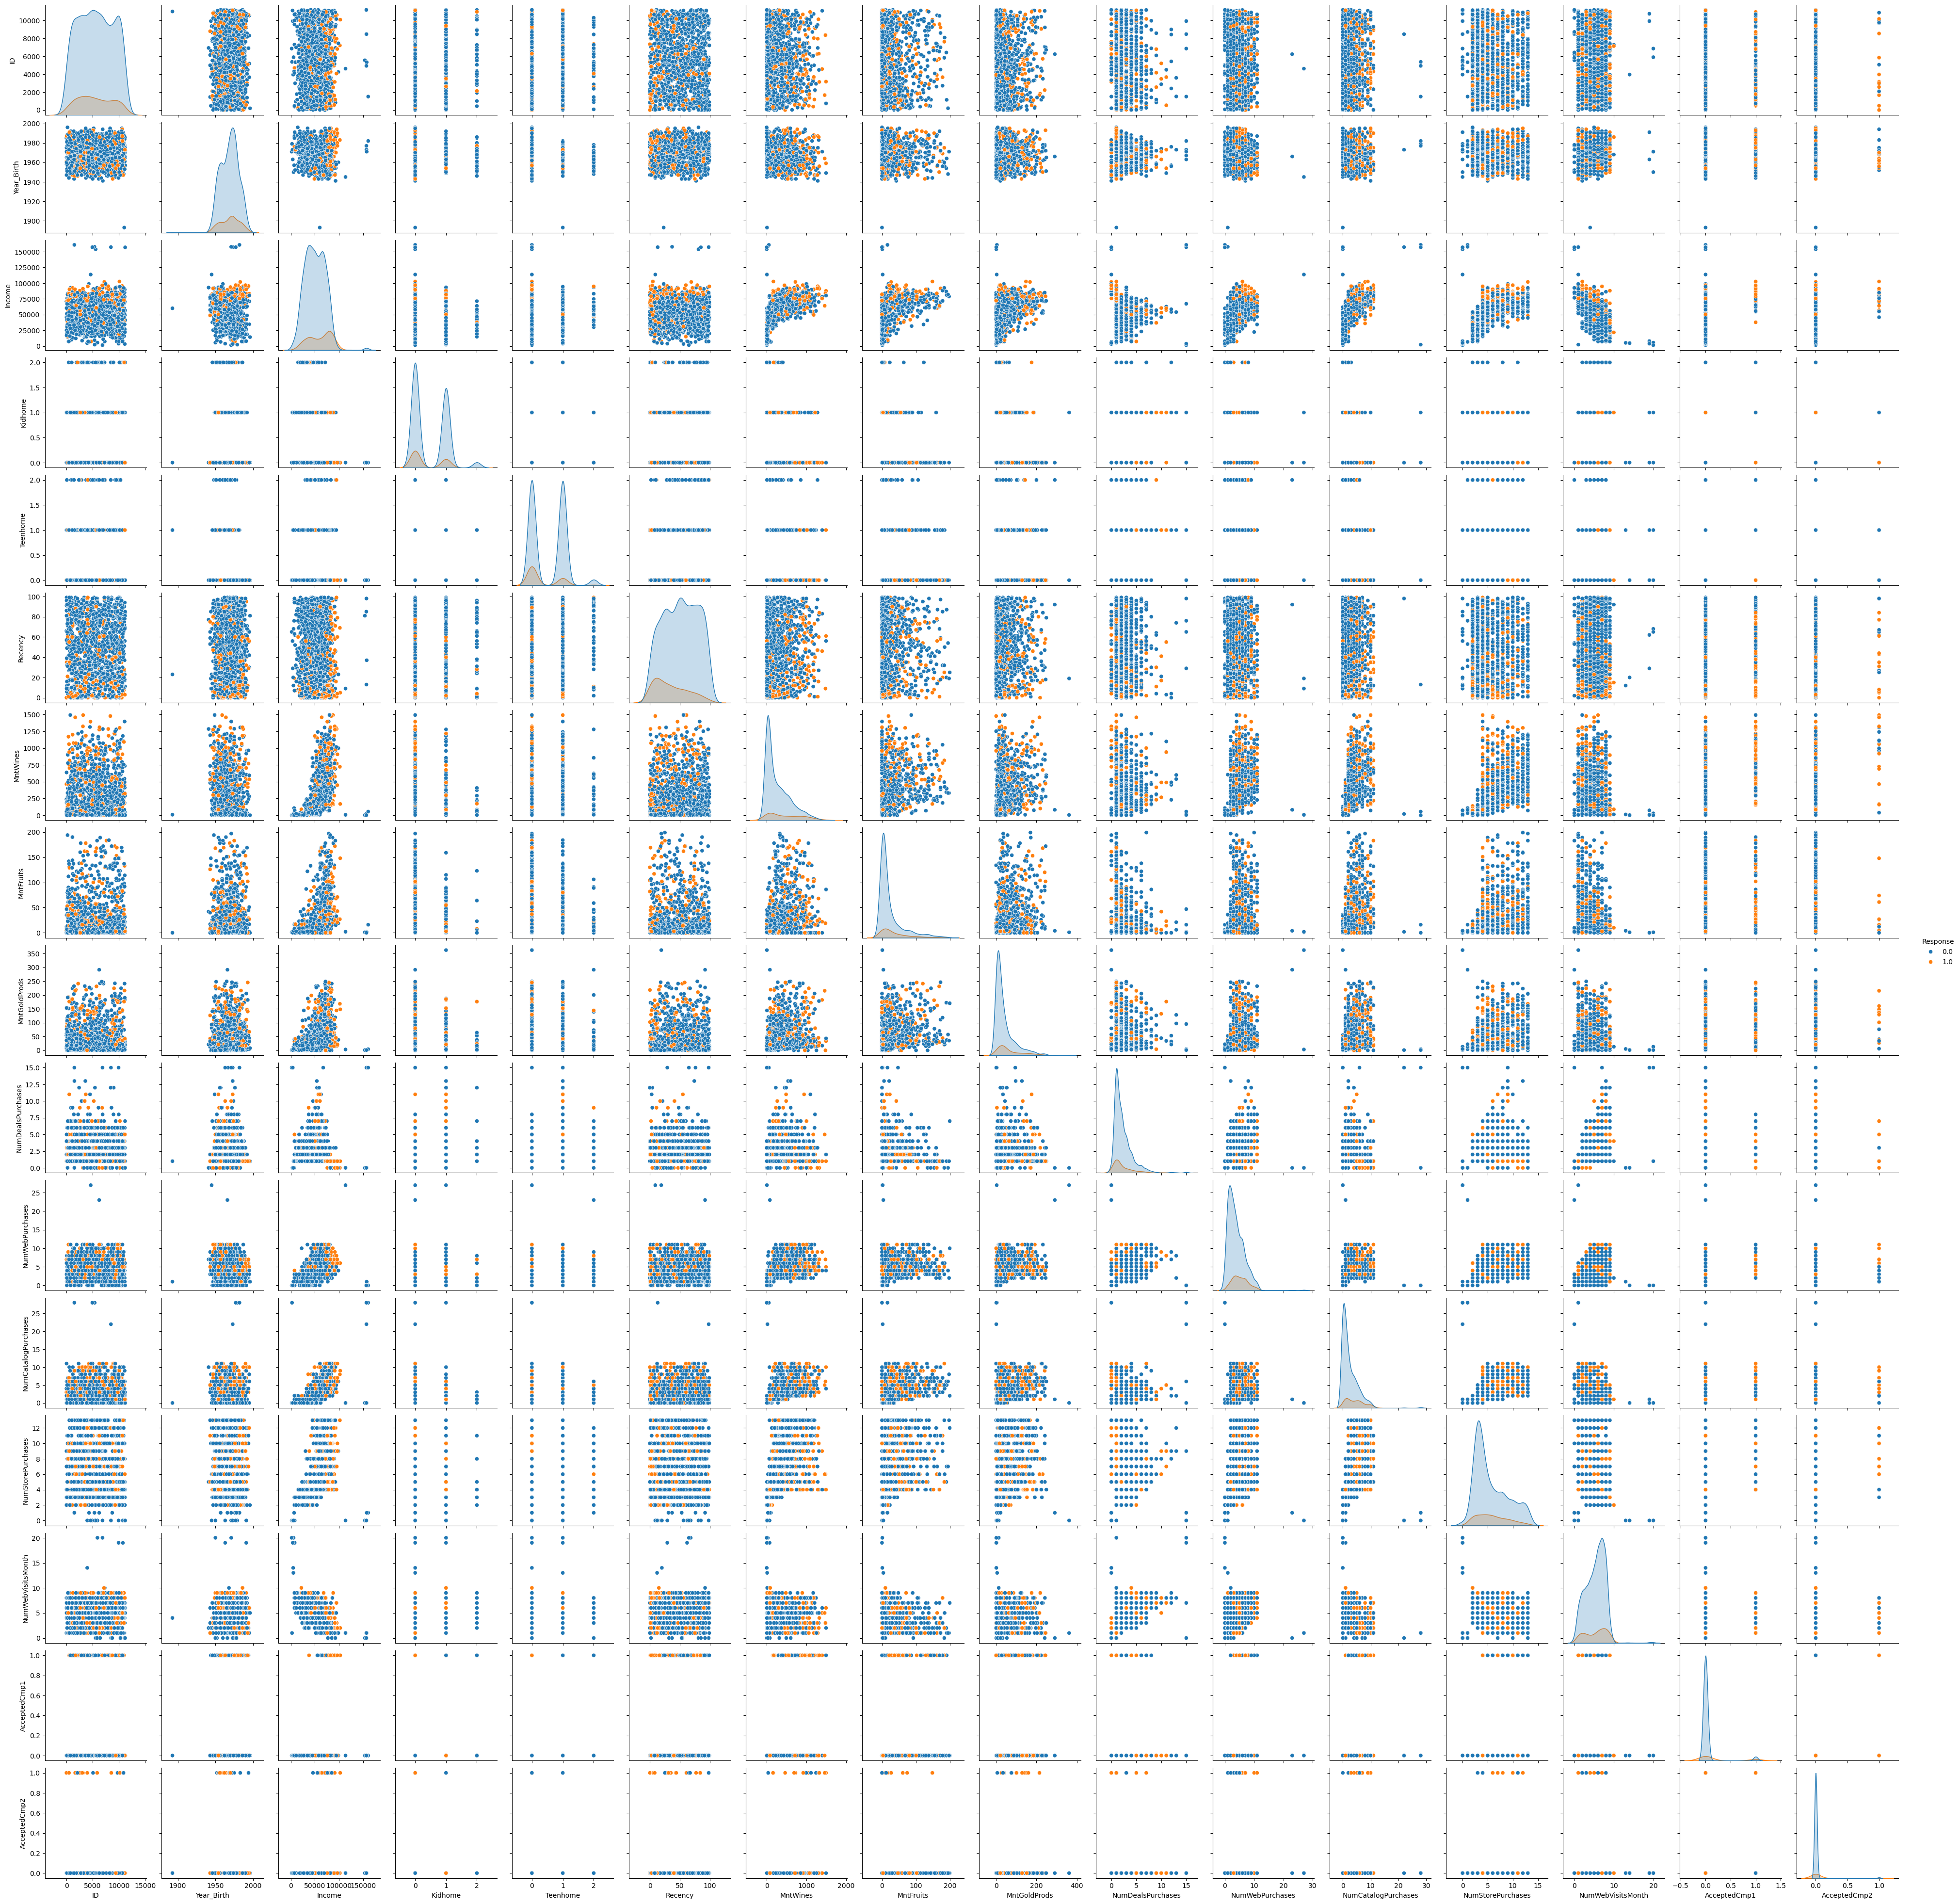

In [5]:
sns.pairplot(df,hue='Response')

In [33]:
df.isnull().sum()

ID                     308
Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   float64
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

In [37]:
encoder_label=LabelEncoder()
df['Education']=encoder_label.fit_transform(df['Education'])

In [41]:
df['Education'].value_counts()

Education
2    962
5    421
6    319
3    317
0    171
1     48
4      2
Name: count, dtype: int64

In [45]:
df_copy = df.copy()
df_copy['Education'] = df_copy['Education'].replace(6, np.nan)

In [53]:
df = df_copy.copy()

In [99]:
df_copy.sample(10)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
2195   2980.0      1952.0        3.0             4.0   8820.0      1.0   
1267  11114.0      1970.0        2.0             5.0      NaN      1.0   
1003   5527.0      1987.0        2.0             5.0  22434.0      NaN   
779       NaN      1971.0        2.0             4.0  72258.0      0.0   
884    5830.0      1972.0        5.0             4.0  86857.0      0.0   
1953   7919.0      1976.0        5.0             5.0  72335.0      0.0   
377    4459.0      1989.0        2.0             4.0  30279.0      1.0   
60        NaN      1982.0        3.0             NaN  75777.0      0.0   
2037   5872.0      1951.0        2.0             4.0  60689.0      0.0   
1207   3068.0      1990.0        2.0             NaN  18351.0      0.0   

      Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntGoldProds  \
2195       1.0       2013.0     52.0      12.0        0.0           NaN   
1267       0.0       2013.0     94.0      25.0        4.0          32.0   
1003       NaN       2013.0     25.0       4.0       12.0          15.0   
779        1.0       2013.0     28.0     522.0        0.0         134.0   
884        0.0       2012.0     96.0     899.0        NaN          40.0   
1953       0.0       2012.0      NaN       NaN        NaN           0.0   
377        0.0       2012.0     13.0       NaN        4.0           1.0   
60         0.0       2013.0     12.0     712.0       26.0           NaN   
2037       1.0          NaN     23.0     240.0       90.0          24.0   
1207       0.0       2013.0      1.0       NaN       12.0           7.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2195                4.0              3.0                  0.0   
1267                3.0              NaN                  1.0   
1003                NaN              2.0                  0.0   
779                 2.0              6.0                  9.0   
884                 1.0              5.0                  6.0   
1953                1.0             10.0                  4.0   
377                 1.0              1.0                  0.0   
60                  1.0              NaN                  6.0   
2037                4.0              4.0                  4.0   
1207                1.0              2.0                  0.0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
2195                3.0                8.0           0.0           NaN   
1267                3.0                7.0           0.0           0.0   
1003                3.0                8.0           0.0           0.0   
779                 5.0                NaN           0.0           0.0   
884                10.0                2.0           0.0           0.0   
1953                NaN                8.0           0.0           0.0   
377                 3.0                8.0           0.0           0.0   
60                  NaN                1.0           NaN           NaN   
2037               10.0                3.0           0.0           0.0   
1207                NaN                7.0           NaN           0.0   

      Response  
2195       0.0  
1267       0.0  
1003       0.0  
779        0.0  
884        1.0  
1953       1.0  
377        0.0  
60         NaN  
2037       0.0  
1207       NaN

In [77]:
df['Marital_Status']=encoder_label.fit_transform(df['Marital_Status'])

In [79]:
df['Marital_Status'].value_counts()

Marital_Status
3    745
5    501
4    407
8    316
2    200
6     66
1      2
0      2
7      1
Name: count, dtype: int64

In [81]:
df_copy = df.copy()
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(8, np.nan)
df = df_copy.copy()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   float64
 3   Marital_Status       1924 non-null   float64
 4   Income               1855 non-null   float64
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

In [95]:
df_copy['Dt_Customer'] = df_copy['Dt_Customer'].apply(lambda x: int(x[-4:]) if pd.notna(x) else None)

In [115]:
df_copy.isnull().sum()

ID                     308
Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [117]:
df_copy.drop(columns='ID', axis=1, inplace=True)

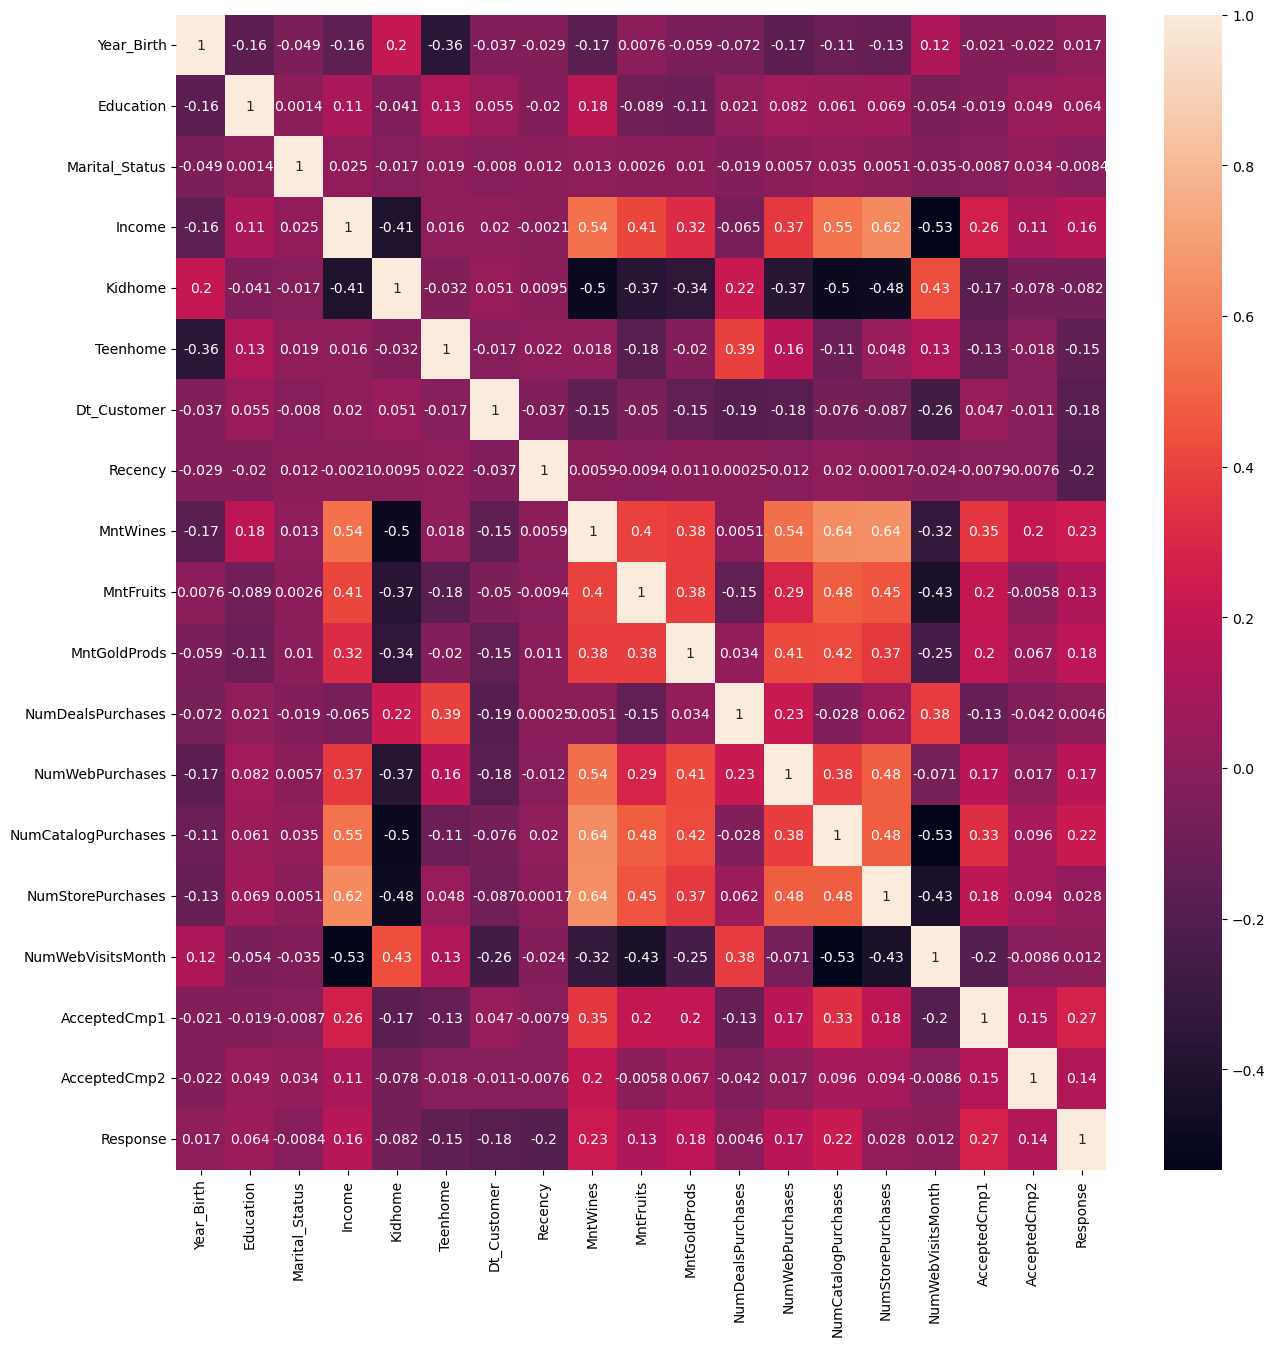

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

In [195]:
imputer_simple = SimpleImputer(strategy='mean')
imputer_simple_median=SimpleImputer(strategy='median')
Imputer_KNN = KNNImputer()
MICE_imputer=IterativeImputer()
df['Year_Birth'] = imputer_simple.fit_transform(df[['Year_Birth']])

In [199]:
df['Education'] = imputer_simple_median.fit_transform(df[['Education']])
df['Marital_Status'] = imputer_simple_median.fit_transform(df[['Marital_Status']])
df['Income'] = imputer_simple.fit_transform(df[['Income']])
df['Kidhome']=Imputer_KNN.fit_transform(df[['Kidhome']])
df['Teenhome']=Imputer_KNN.fit_transform(df[['Teenhome']])
df['Dt_Customer']=Imputer_KNN.fit_transform(df[['Dt_Customer']])
df['Recency']=Imputer_KNN.fit_transform(df[['Recency']])
df['MntWines']=MICE_imputer.fit_transform(df[['NumStorePurchases','NumCatalogPurchases','NumWebPurchases']])
df['MntFruits'] = Imputer_KNN.fit_transform(df[['MntFruits']])

In [217]:
df['MntGoldProds'] = Imputer_KNN.fit_transform(df[['MntGoldProds']])
df['NumDealsPurchases'] = Imputer_KNN.fit_transform(df[['NumDealsPurchases']])
df['NumWebPurchases'] = MICE_imputer.fit_transform(df[['MntWines']])
df['NumCatalogPurchases'] = MICE_imputer.fit_transform(df[['Income','MntWines']])
df['NumStorePurchases']=MICE_imputer.fit_transform(df[['Income','MntWines']])
df['NumWebVisitsMonth']=MICE_imputer.fit_transform(df[['Income', 'NumCatalogPurchases']])
df['AcceptedCmp1']=Imputer_KNN.fit_transform(df[['AcceptedCmp1']])
df['AcceptedCmp2']=Imputer_KNN.fit_transform(df[['AcceptedCmp2']])

In [229]:
df_copy.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

<Axes: >

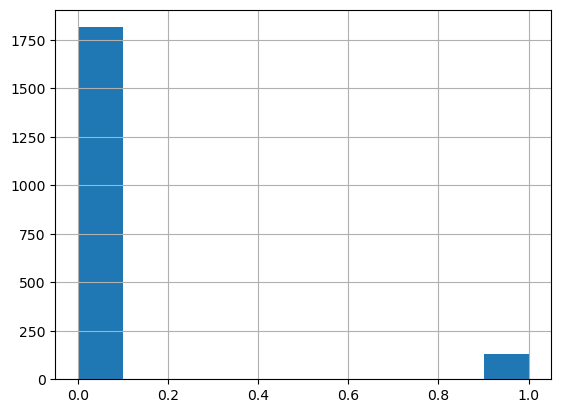

In [215]:
df['AcceptedCmp1'].hist()

In [221]:
df_copy = df.copy()

In [239]:
df = df_copy.copy()

In [227]:
df_copy.dropna(subset='Response', axis=0, inplace=True)

In [231]:
df_copy.sample(10)

Year_Birth  Education  Marital_Status   Income   Kidhome  Teenhome  \
2004  1968.633766        3.0             4.0  46423.0  1.000000       1.0   
963   1975.000000        5.0             3.0  40233.0  0.000000       1.0   
277   1981.000000        3.0             4.0  77882.0  0.000000       0.0   
364   1967.000000        2.0             3.0  51479.0  1.000000       1.0   
860   1969.000000        2.0             5.0  23228.0  1.000000       0.0   
1193  1952.000000        2.0             4.0  62307.0  0.000000       1.0   
692   1958.000000        3.0             5.0  42315.0  0.000000       1.0   
480   1973.000000        3.0             3.0  38961.0  1.000000       0.0   
200   1952.000000        2.0             2.0  69142.0  0.000000       1.0   
1905  1954.000000        2.0             3.0  62820.0  0.447683       0.0   

      Dt_Customer    Recency  MntWines  MntFruits  MntGoldProds  \
2004  2013.000000   6.000000  4.000000        0.0           8.0   
963   2013.000000  84.000000  5.000000        4.0           2.0   
277   2014.000000  48.723316  5.425591      129.0          15.0   
364   2012.000000  67.000000  6.000000        8.0          65.0   
860   2014.000000  71.000000  3.000000        2.0           0.0   
1193  2014.000000  94.000000  4.000000       13.0          10.0   
692   2013.000000  90.000000  4.000000       15.0          80.0   
480   2013.000000  60.000000  2.000000        7.0          24.0   
200   2014.000000  50.000000  7.000000        4.0          39.0   
1905  2013.020218  48.723316  6.000000       61.0          53.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2004           3.000000         4.000000              46423.0   
963            5.000000         5.000000              40233.0   
277            1.000000         5.425591              77882.0   
364            2.322314         6.000000              51479.0   
860            2.000000         3.000000              23228.0   
1193           2.322314         4.000000              62307.0   
692            3.000000         4.000000              42315.0   
480            1.000000         2.000000              38961.0   
200            3.000000         7.000000              69142.0   
1905           1.000000         6.000000              62820.0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
2004            46423.0            46423.0      0.000000      0.000000   
963             40233.0            40233.0      0.000000      0.000000   
277             77882.0            77882.0      0.000000      0.000000   
364             51479.0            51479.0      0.000000      0.000000   
860             23228.0            23228.0      0.000000      0.000000   
1193            62307.0            62307.0      0.000000      0.000000   
692             42315.0            42315.0      0.000000      0.000000   
480             38961.0            38961.0      0.000000      0.000000   
200             69142.0            69142.0      0.000000      0.013007   
1905            62820.0            62820.0      0.066358      0.013007   

      Response  
2004       0.0  
963        0.0  
277        0.0  
364        0.0  
860        0.0  
1193       0.0  
692        0.0  
480        0.0  
200        0.0  
1905       0.0

In [237]:
model = xgb.XGBClassifier()

In [241]:
X, Y = df.drop(columns=['Response']), df['Response']
X_Train, X_test, Y_Train, Y_test = train_test_split(X,Y,test_size=0.2)

In [243]:
model.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [245]:
Y_pred = model.predict(X_test)

In [247]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       347
           1       0.30      0.61      0.40        33

    accuracy                           0.84       380
   macro avg       0.63      0.74      0.66       380
weighted avg       0.90      0.84      0.87       380



In [251]:
Y_train_pred = model.predict(X_Train)

In [253]:
print(classification_report(Y_train_pred, Y_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1313
           1       1.00      1.00      1.00       207

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520



In [255]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_Train, Y_Train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.85197368 0.85855263 0.87828947 0.89473684 0.86842105]
Mean CV Score: 0.8704
